In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

%matplotlib inline

In [2]:
guad = '/global/cfs/cdirs/desi/spectro/fastspecfit/guadalupe/catalogs'
file = os.path.join(guad, 'fastspec-guadalupe.fits')

data = Table.read(file, format='fits', hdu=1)

In [3]:
data

TARGETID,SURVEY,PROGRAM,HEALPIX,CONTINUUM_Z,CONTINUUM_COEFF [16],CONTINUUM_RCHI2,CONTINUUM_AGE,CONTINUUM_AV,CONTINUUM_AV_IVAR,CONTINUUM_VDISP,CONTINUUM_VDISP_IVAR,CONTINUUM_SNR_B,CONTINUUM_SNR_R,CONTINUUM_SNR_Z,CONTINUUM_SMOOTHCORR_B,CONTINUUM_SMOOTHCORR_R,CONTINUUM_SMOOTHCORR_Z,DN4000,DN4000_IVAR,DN4000_MODEL,FLUX_SYNTH_G,FLUX_SYNTH_R,FLUX_SYNTH_Z,FLUX_SYNTH_MODEL_G,FLUX_SYNTH_MODEL_R,FLUX_SYNTH_MODEL_Z,RCHI2,LINERCHI2_BROAD,DELTA_LINERCHI2,NARROW_Z,BROAD_Z,UV_Z,NARROW_SIGMA,BROAD_SIGMA,UV_SIGMA,MGII_DOUBLET_RATIO,OII_DOUBLET_RATIO,SII_DOUBLET_RATIO,OI_1304_AMP,OI_1304_AMP_IVAR,OI_1304_FLUX,OI_1304_FLUX_IVAR,OI_1304_BOXFLUX,OI_1304_BOXFLUX_IVAR,OI_1304_VSHIFT,OI_1304_SIGMA,OI_1304_CONT,OI_1304_CONT_IVAR,OI_1304_EW,OI_1304_EW_IVAR,OI_1304_FLUX_LIMIT,OI_1304_EW_LIMIT,OI_1304_CHI2,OI_1304_NPIX,SILIV_1396_AMP,SILIV_1396_AMP_IVAR,SILIV_1396_FLUX,SILIV_1396_FLUX_IVAR,SILIV_1396_BOXFLUX,SILIV_1396_BOXFLUX_IVAR,SILIV_1396_VSHIFT,SILIV_1396_SIGMA,SILIV_1396_CONT,SILIV_1396_CONT_IVAR,SILIV_1396_EW,SILIV_1396_EW_IVAR,SILIV_1396_FLUX_LIMIT,SILIV_1396_EW_LIMIT,SILIV_1396_CHI2,SILIV_1396_NPIX,CIV_1549_AMP,CIV_1549_AMP_IVAR,CIV_1549_FLUX,CIV_1549_FLUX_IVAR,CIV_1549_BOXFLUX,CIV_1549_BOXFLUX_IVAR,CIV_1549_VSHIFT,CIV_1549_SIGMA,CIV_1549_CONT,CIV_1549_CONT_IVAR,CIV_1549_EW,CIV_1549_EW_IVAR,CIV_1549_FLUX_LIMIT,CIV_1549_EW_LIMIT,CIV_1549_CHI2,CIV_1549_NPIX,SILIII_1892_AMP,SILIII_1892_AMP_IVAR,SILIII_1892_FLUX,SILIII_1892_FLUX_IVAR,SILIII_1892_BOXFLUX,SILIII_1892_BOXFLUX_IVAR,SILIII_1892_VSHIFT,SILIII_1892_SIGMA,SILIII_1892_CONT,SILIII_1892_CONT_IVAR,SILIII_1892_EW,SILIII_1892_EW_IVAR,SILIII_1892_FLUX_LIMIT,SILIII_1892_EW_LIMIT,SILIII_1892_CHI2,SILIII_1892_NPIX,CIII_1908_AMP,CIII_1908_AMP_IVAR,CIII_1908_FLUX,CIII_1908_FLUX_IVAR,CIII_1908_BOXFLUX,CIII_1908_BOXFLUX_IVAR,CIII_1908_VSHIFT,CIII_1908_SIGMA,CIII_1908_CONT,CIII_1908_CONT_IVAR,CIII_1908_EW,CIII_1908_EW_IVAR,CIII_1908_FLUX_LIMIT,CIII_1908_EW_LIMIT,CIII_1908_CHI2,CIII_1908_NPIX,MGII_2796_AMP,MGII_2796_AMP_IVAR,MGII_2796_FLUX,MGII_2796_FLUX_IVAR,MGII_2796_BOXFLUX,MGII_2796_BOXFLUX_IVAR,MGII_2796_VSHIFT,MGII_2796_SIGMA,MGII_2796_CONT,MGII_2796_CONT_IVAR,MGII_2796_EW,MGII_2796_EW_IVAR,MGII_2796_FLUX_LIMIT,MGII_2796_EW_LIMIT,MGII_2796_CHI2,MGII_2796_NPIX,MGII_2803_AMP,MGII_2803_AMP_IVAR,MGII_2803_FLUX,MGII_2803_FLUX_IVAR,MGII_2803_BOXFLUX,MGII_2803_BOXFLUX_IVAR,MGII_2803_VSHIFT,MGII_2803_SIGMA,MGII_2803_CONT,MGII_2803_CONT_IVAR,MGII_2803_EW,MGII_2803_EW_IVAR,MGII_2803_FLUX_LIMIT,MGII_2803_EW_LIMIT,MGII_2803_CHI2,MGII_2803_NPIX,NEV_3346_AMP,NEV_3346_AMP_IVAR,NEV_3346_FLUX,NEV_3346_FLUX_IVAR,NEV_3346_BOXFLUX,NEV_3346_BOXFLUX_IVAR,NEV_3346_VSHIFT,NEV_3346_SIGMA,NEV_3346_CONT,NEV_3346_CONT_IVAR,NEV_3346_EW,NEV_3346_EW_IVAR,NEV_3346_FLUX_LIMIT,NEV_3346_EW_LIMIT,NEV_3346_CHI2,NEV_3346_NPIX,NEV_3426_AMP,NEV_3426_AMP_IVAR,NEV_3426_FLUX,NEV_3426_FLUX_IVAR,NEV_3426_BOXFLUX,NEV_3426_BOXFLUX_IVAR,NEV_3426_VSHIFT,NEV_3426_SIGMA,NEV_3426_CONT,NEV_3426_CONT_IVAR,NEV_3426_EW,NEV_3426_EW_IVAR,NEV_3426_FLUX_LIMIT,NEV_3426_EW_LIMIT,NEV_3426_CHI2,NEV_3426_NPIX,OII_3726_AMP,OII_3726_AMP_IVAR,OII_3726_FLUX,OII_3726_FLUX_IVAR,OII_3726_BOXFLUX,OII_3726_BOXFLUX_IVAR,OII_3726_VSHIFT,OII_3726_SIGMA,OII_3726_CONT,OII_3726_CONT_IVAR,OII_3726_EW,OII_3726_EW_IVAR,OII_3726_FLUX_LIMIT,OII_3726_EW_LIMIT,OII_3726_CHI2,OII_3726_NPIX,OII_3729_AMP,OII_3729_AMP_IVAR,OII_3729_FLUX,OII_3729_FLUX_IVAR,OII_3729_BOXFLUX,OII_3729_BOXFLUX_IVAR,OII_3729_VSHIFT,OII_3729_SIGMA,OII_3729_CONT,OII_3729_CONT_IVAR,OII_3729_EW,OII_3729_EW_IVAR,OII_3729_FLUX_LIMIT,OII_3729_EW_LIMIT,OII_3729_CHI2,OII_3729_NPIX,NEIII_3869_AMP,NEIII_3869_AMP_IVAR,NEIII_3869_FLUX,NEIII_3869_FLUX_IVAR,NEIII_3869_BOXFLUX,NEIII_3869_BOXFLUX_IVAR,NEIII_3869_VSHIFT,NEIII_3869_SIGMA,NEIII_3869_CONT,NEIII_3869_CONT_IVAR,NEIII_3869_EW,NEIII_3869_EW_IVAR,NEIII_3869_FLUX_LIMIT,NEIII_3869_EW_LIMIT,NEIII_3869_CHI2,NEIII_3869_NPIX,H6_AMP,H6_AMP_IVAR,H6_FLUX,H6_FLUX_IVAR,H6_BOXFLUX,H6_BOXFLUX_IVAR,H6_VSHIFT,H6_SIGMA,H6_CONT,H6_CONT_IVAR,H6_EW,H6_EW_IVAR,H6_FLUX_LIMIT,H6_EW_LIMIT,H6_CH

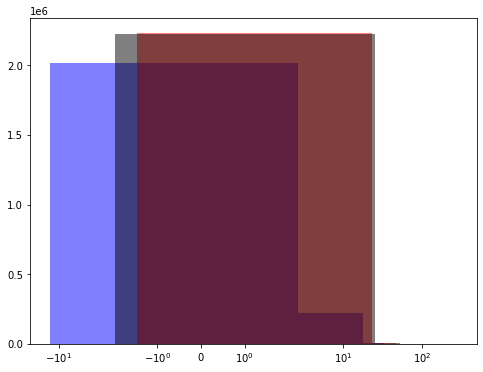

In [4]:
def logHist(data, ax, nbins=100, **kwargs):
    
    hist, bins = np.histogram(data, bins=nbins)
    logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
    hist, bins = np.histogram(data,bins=logbins)
    ax.bar(bins[:-1], hist, width=np.diff(bins), align="edge", **kwargs)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data['CONTINUUM_SNR_B'], color='b', alpha=0.5, label='B SNR')
ax.hist(data['CONTINUUM_SNR_R'], color='r', alpha=0.5, label='R SNR')
ax.hist(data['CONTINUUM_SNR_Z'], color='k', alpha=0.5, label='Z SNR')
ax.set_xscale('symlog')

Text(0.5, 0, 'Redshift')

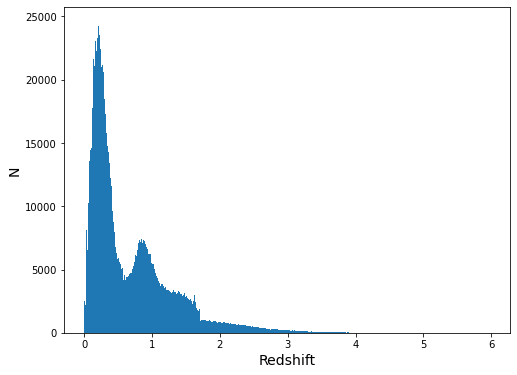

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data['CONTINUUM_Z'], bins=1000)
ax.set_ylabel('N', fontsize=14)
ax.set_xlabel('Redshift', fontsize=14)
#ax.set_yscale('log')

Text(0.5, 0, 'Light-Weighted Age [Gyr]')

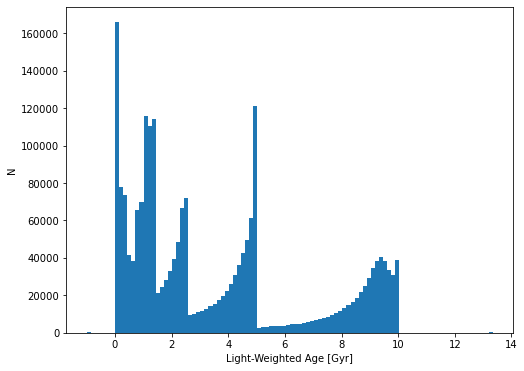

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data['CONTINUUM_AGE'], bins=100)
ax.set_ylabel('N')
ax.set_xlabel('Light-Weighted Age [Gyr]')

Text(0.5, 0, 'Light-Weighted Age [Gyr]')

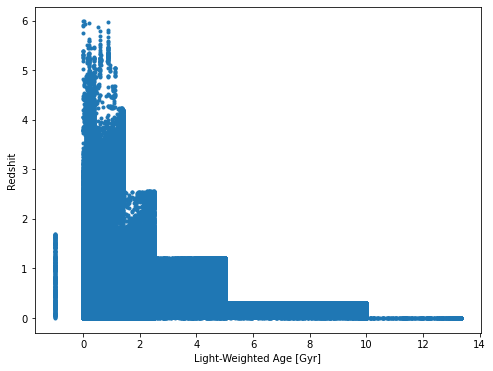

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data['CONTINUUM_AGE'], data['CONTINUUM_Z'], '.')
ax.set_ylabel('Redshit')
ax.set_xlabel('Light-Weighted Age [Gyr]')

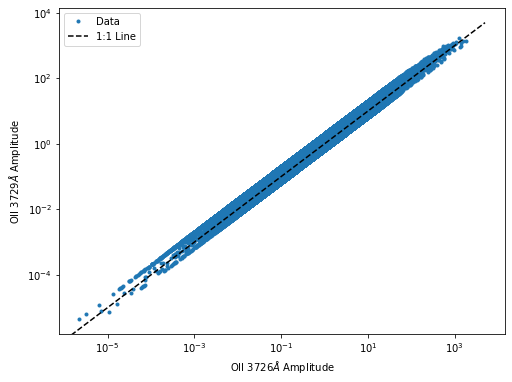

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data['OII_3726_AMP'], data['OII_3729_AMP'], '.', label='Data')
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot([0, 5000], [0, 5000], 'k--', label='1:1 Line')
ax.set_xlabel(r'OII 3726$\AA$ Amplitude')
ax.set_ylabel(r'OII 3729$\AA$ Amplitude')
ax.legend();

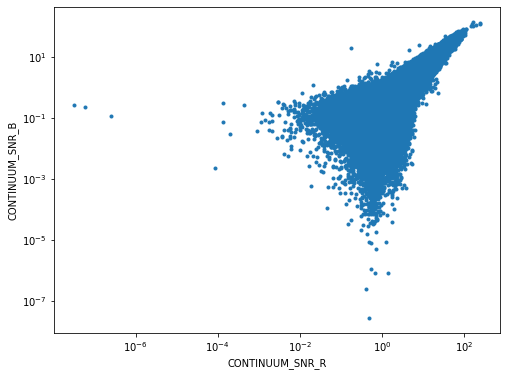

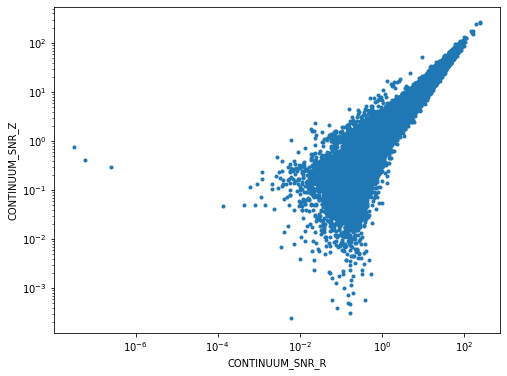

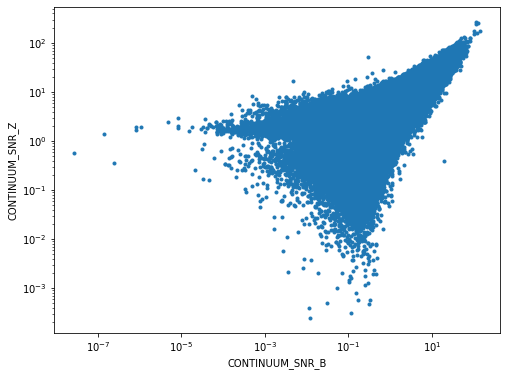

In [9]:
def plotSNR(k1, k2):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(data[k1], data[k2], '.')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

keysToPlot = ['CONTINUUM_SNR_R', 'CONTINUUM_SNR_B', 'CONTINUUM_SNR_Z']

for ii, key1 in enumerate(keysToPlot):
    for key2 in keysToPlot[ii+1:]:
        if key1 != key2:
            plotSNR(key1, key2)

In [16]:
# Read in some Guadalupe spectra
spec = Table.read('/global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog/zpix-main-bright.fits', format='fits', hdu=1)

In [17]:
spec

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633192419853982,10000,10000,0.03768131081242892,3.852061824477527e-06,0,7679.1721932291985,1039.3360306625157 .. 8.300501709219164,7906,GALAXY,--,10,2130.768586933613,0,252.92687803206968,46.536735591055674,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.850263393143325,516,9011,2529p465,571086,1694,SER,0.019520197,15.28663,21.711166,26.56284,14.621476,5.1932435,133.69522,35.29861,26.31763,4.764854,1.6115698,3.9004745,5.539733,6.7776666,3.9004745,5.539733,6.7776666,0,0.7186158,1.2290907,-0.018304463,-0.16170786,0,--,0.0,0.0,0.0,0.0,N,2100,2,1152921504606846976,514,0,0,252.92687803206968,46.536735591055674,1,442.5022,1,1,0.001,0.001,-0.007,0.007,252.92688117445672,0.0,46.536762685656484,0.0,0.73440033,44.85684,0.019960195,8.332401,14.4543915,110.51578,64.62738,0.52926874,0.21445554,1278.6799,3.6977777,237.06061,0.0029788588,223.63417,1844.7067,0.9251271,4.811232,5.4636785e-06,13.7044935,1.0073055e-06,0.0,765.85925,7.670622e-06,3.1385128,7.3677464,1323.5367,17.422232,245.393,14.457371,1100.0093,1909.334,4.592909,12.393435,1,True
39633188250716069,10001,10001,-0.0006552097456118187,4.67384942041175e-06,0,12244.191531231718,5921.738780264827 .. 0.0,7862,STAR,K,5,3798.6610474082663,0,253.59857556877355,46.245138036902944,-1.1106461,-0.89099985,2015.5,2305843009213693952,1,TGT,0.9320531634626462,516,9011,2536p462,570092,1957,PSF,0.018271104,57.748344,109.608086,152.16661,58.416958,30.096806,44.69639,19.042627,20.306168,3.4689436,1.5110312,44.96402,85.343056,118.47998,44.96402,85.343056,118.47998,0,0.0,0.0,0.0,0.0,1407530876765981184,G2,17.518497,18.006369,16.866531,0.035543706,N,1500,2,2305843009213693952,0,768,0,253.59857556877355,46.245138036902944,1,442.5022,1,1,0.001,0.001,-0.003,0.003,253.5985803680059,0.0,46.24514954214408,0.0,0.789,41.925316,0.016808514,7.9071903,9.398123,99.80945,66.72592,0.44470832,0.2018377